# 18. 프로젝트 : 다양한 OCR모델 비교하기

우리는 지금까지 **Google OCR API, keras-ocr, Tesseract** 이상 3가지의 **OCR 기능**을 간단히 활용하여 보았습니다.

지금까지 살펴본 바로는 무료로 사용할 수 있는 기능들이지만 모두 준수한 성능을 갖추고 있었습니다. OCR 분야가 이미 실용적인 수준에까지 기술이 발전했기 때문에 이런 것들만 잘 활용해도 실전에 활용할 수 있는 좋은 서비스를 만들어 낼 수 있을것도 같습니다. 그런데 과연 어떤 것을 사용하는 것이 좋을까요?

OCR 기술들이 실용적인 수준까지 꽤 발전했지만 그럼에도 불구하고 아직 완전한 수준은 아닙니다.   
용도에 맞게 적절한 것을 선택하는 것도 중요한 일입니다.   
그래서 오늘 다뤄본 **위 3가지를 검증해 보는 프로젝트**를 진행하겠습니다.   
여러분은 OCR 기능을 활용한 서비스를 빠르게 개발해야 하는 임무를 맡은 엔지니어가 되어,   
**어떤 모듈을 도입하면 좋을지 기술검증**을 하는 역할을 맡게 되었다고 가정합니다.

## 루브릭


|평가문항|	상세기준|
|:-------|:-------|
|1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?|목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.|
|2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?|평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.|
|3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?|최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.

**<span style='color:blue'>목표하는 서비스 : 메뉴판 한글 인식하기</span>**

참고 자료 :   
* [딥러닝을 활용한 한글문장 OCR 프로젝트](https://medium.com/@sunwoopark/딥러닝을-활용한-한글문장-ocr-프로젝트-hclt-2019-bb9d17622412)  
* [딥러닝을 활용한 한글문서 OCR 연구](https://github.com/parksunwoo/ocr_kor)  
* [한글 음절 인식기(OCR)](https://junstar92.tistory.com/154)
* [딥러닝을 이용한 한글 OCR 정확도 향상에 대한 연구](https://scienceon.kisti.re.kr/commons/util/originalView.do?dbt=CFKO&cn=CFKO201821464987120&oCn=NPAP12688214&pageCode=PG11&journal=NPRO00377584)  



**<span style='color:blue'>평가기준 : 이미지의 글자와 비교하여 각 글자의 형태와 순서가 일치하는지 판단</span>**
- 전체 글자의 개수 : C, 
- 정확히 출력된 글자의 개수 : L
- 일치율 = L/C * 100

## Step1. 검증용 데이터셋 준비

OCR 관련해서 오늘 다루어본 주제는 **텍스트의 모양과 크기, 배치, 노이즈** 등 **OCR의 성능에 영향을 미치는 요인**들에 관한 것이었습니다.   
여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 **detect하고 recognize**하는지를 검증하기 위한 이미지 데이터를 모아야 합니다.   
이미지가 많을수록 좋겠지만 **검증해야 할 항목별로 고루 갖춰지는 것도 중요**합니다.

가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다.   
그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 **20장**을 넘기지 않는 것으로 합시다.

* 인터넷에서 메뉴판 이미지를 찾아서 다운로드 하였으며 아래와 같은 사항을 고려한다.
  - 텍스트의 방향이 가로 및 세로로 되어 있는 것
  - 글자 크기가 동일한 것과 다양한 것
  - 배경이 없는 것과 있는 것
  - 한글만 있는 것과 다른 언어가 섞여 있는 것
  - 식당이 다양하여 메뉴판 내용이 다양한 것

## Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행

위 3가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다.   
이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다.

### 이미지 리스트

In [9]:
import os

dir_path = os.getenv('HOME')+ '/aiffel/ocr_python/test_images'
file_lists = sorted(os.listdir(dir_path))

print (f"file_lists: {file_lists}")

file_lists: ['01.png', '02.jpg', '03.jpg', '04.jpg', '05.png', '06.jpg', '07.jpeg', '08.jpg', '09.jpeg', '10.jpeg', '11.jpg', '20.jpeg', '21.jpg']


### Google OCR API 사용 테스트

참고 : [로컬 이미지의 텍스트 감지](https://cloud.google.com/vision/docs/ocr?hl=ko#vision_text_detection-python)

In [2]:
# Google OCR API 활용하는 함수
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    
    client = vision.ImageAnnotatorClient()      #  Vision API에 액세스

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

* `vision.ImageAnnotatorClient()` : Vision API에 액세스 [참고](https://cloud.google.com/vision/docs/fulltext-annotations?hl=ko)
* `vision.Image()` :
* `.text_detection()` : 임의의 이미지에서 텍스트를 감지하고 추출 [참고](https://cloud.google.com/vision/docs/ocr?hl=ko)
  - respose 에는 상세한 정보들이 저장됩니다
    - 어느 언어로 인식 했는지 부터 
    - 문장 별, 단어 별, 각 철자 별 어떻게 인식을 하였는지, 
    - 이미지에서 위치는 어디에 있는지 상세 정보들이 담기게 됩니다.
* `.text_annotations`:
  - texts 에는 response 에서 내용을 좀 더 간추립니다
  - 철자는 제외하고 문장과 단어에 대한 정보만 담기게 됩니다.
* `.description` :
* `.bounding_poly.vertices` :

In [3]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'


-rw-rw-r-- 1 aiffel-d34j aiffel-d34j 2352  3월 16 10:48 /home/aiffel-d34j/aiffel/ocr_python/my_google_api_key.json


**똑바로 보이는 이미지 테스트 :**  
<img align='center' width='30%' src='./images/E18_01.png' />

In [4]:
# 테스트 이미지 1개로 확인 (똑바로 보이는 이미지)
# file_name = os.path.join(os.path.dirname(__file__), 'Hello_world.png')
file_name  = os.getenv('HOME')+'/aiffel/ocr_python/test_image01.png'   # .jpg, png, jpeg

detect_text(file_name)

Texts:

"세상의 속도를
따라잡고싶다면
Do
it!
내 손으로 직접 코딩하며 확인한다!
자료구조와 함께배우는
알고리즘 입문 편
코딩 테스트도 통과하고!알고리즘 과목은 At 받고!
Bohyoh Shibata 지음, 강민옮김
공학교육협회 저작상 수상 저자!
이지스퍼블리싱
엄선한 실습 예제 136개와 그림 213개로 배운다!
"

"세상"

"의"

"속도"

"를"

"따라"

"잡고"

"싶다면"

"Do"

"it!"

"내"

"손"

"으로"

"직접"

"코딩"

"하며"

"확인"

"한다"

"!"

"자료"

"구조"

"와"

"함께"

"배우는"

"알고리즘"

"입문"

"편"

"코딩"

"테스트"

"도"

"통과"

"하고"

"!"

"알고리즘"

"과목"

"은"

"At"

"받고"

"!"

"Bohyoh"

"Shibata"

"지음"

","

"강민"

"옮김"

"공학"

"교육"

"협회"

"저작"

"상"

"수상"

"저자"

"!"

"이지스"

"퍼블리싱"

"엄선한"

"실습"

"예제"

"136"

"개와"

"그림"

"213"

"개로"

"배운다"

"!"
bounds: (255,910),(255,910),(255,918),(255,918)


**기울어진 이미지 테스트 :**
<img align='center' width='30%' src='./images/E18_02.jpeg' />

In [5]:
# 테스트 이미지 1개로 확인 (기울어진 이미지)
file_name  = os.getenv('HOME')+'/aiffel/ocr_python/test_image04.jpeg'   # .jpg, png, jpeg

detect_text(file_name)

Texts:

"Do
it!
자료구조와 함께 배우는
알고리즘 입문 OE
"

"Do"

"it!"

"자료"

"구조"

"와"

"함께"

"배우는"

"알고리즘"

"입문"

"OE"
bounds: (127,116),(174,127),(171,139),(124,129)


* <span style='color:blue'>동일한 내용에 대해서 기울어진 이미지의 경우에는 인식 내용이 차이기 있는 것을 확인할 수 있다.</span>

In [10]:
for file in file_lists:
    print('file_name: ',file)
    
    image_file = os.path.join(dir_path, file)
    
    # Google OCR 
    google_ocr = detect_text(image_file)
    print('='*50)
    print()
    
print("Done")

file_name:  01.png
Texts:

"한마음식당2
김치찌개
된장찌개
부대찌개
국산 묵은지와 돼지고기가
국산 묵은지와 돼지고기가
국산 묵은지와 돼지고기가
들어간 칼칼한김치찌개
들어간 칼칼한 김치찌개
들어간 칼칼한김치찌개
7,000원
7,000원
7,000원
순두부찌개
국산 묵은지와 돼지고기가
들어간 칼칼한 김치찌개
청국장
낙지볶음
국산 묵은지와 돼지고기가
국산 묵은지와 돼지고기가
들어간 칼칼한 김치찌개
들어간 칼칼한 김치찌개
7,000원
7,000원
7,000원
돌솥비빔밥
제육볶음
국산 묵은지와 돼지고기가
들어간 칼칼한 김치찌개
오징어볶음
국산 묵은지와 돼지고기가
들어간 칼칼한 김치찌개
국산 묵은지와 돼지고기가
들어간 칼칼한 김치찌개
7,000원
7,000원
7,000원
소주 4,000
막걸리 3,000
공기밥
3,000
맥주 4,000
음료
2,000
만두사리 2,000
"

"한마음"

"식당"

"2"

"김치"

"찌개"

"된장"

"찌개"

"부대"

"찌개"

"국산"

"묵은지"

"와"

"돼지"

"고기"

"가"

"국산"

"묵은지"

"와"

"돼지"

"고기"

"가"

"국산"

"묵은지"

"와"

"돼지"

"고기"

"가"

"들어간"

"칼칼한"

"김치"

"찌개"

"들어간"

"칼칼한"

"김치"

"찌개"

"들어간"

"칼칼한"

"김치"

"찌개"

"7,000"

"원"

"7,000"

"원"

"7,000"

"원"

"순두부"

"찌개"

"국산"

"묵은지"

"와"

"돼지"

"고기"

"가"

"들어간"

"칼칼한"

"김치"

"찌개"

"청국장"

"낙지"

"볶음"

"국산"

"묵은지"

"와"

"돼지"

"고기"

"가"

"국산"

"묵은지"

"와"

"돼지"

"고기"

"가"

"들어간"

"칼칼한"

"김치"

"찌개"

"들어간"

"칼칼한"

"김치"

"찌개"

"7,000"

"원"

"7,000"

"원"

"7,000"

"원"

"돌솥"

"비빔밥"

"제육"

Texts:

"명가네 MENU
·해물찜/당 w 49,000
Ow 39,000
O w 29,000
·모말(모델소바) 5,000 · 소
•에 밀 손만 두 ₩ 3,000
·생메밀물냉면 w5,000
주 3,000
주 4,000
하 4,000
음료수 1,000
·청
생메말비빔냉면 w 5,000
•일무비빔국수 w5,000
•아구찜/탕 w 49,000
O w 39,000
O w 29,000
음 밥2,000
깃 밥 1,000
'공
·연무한리 .
·오리주물럭(4w 13,000
.오리로스(내 13,000 ·저회 업소는 쌀. 김치 등 국내산 안물 사용합니다.
·삼 겹 살(국대원) w 10,000 ·연을 더 원하시는 분은 달씀만 하시면 무료로 드립니다.
"

"명"

"가네"

"MENU"

"·"

"해물"

"찜"

"/"

"당"

"w"

"49,000"

"Ow"

"39,000"

"O"

"w"

"29,000"

"·"

"모말"

"("

"모델"

"소바"

")"

"5,000"

"·"

"소"

"•"

"에"

"밀"

"손만"

"두"

"₩"

"3,000"

"·"

"생"

"메밀"

"물"

"냉면"

"w5,000"

"주"

"3,000"

"주"

"4,000"

"하"

"4,000"

"음료수"

"1,000"

"·"

"청"

"생"

"메말"

"비빔"

"냉면"

"w"

"5,000"

"•"

"일무"

"비빔"

"국수"

"w5,000"

"•"

"아구찜"

"/"

"탕"

"w"

"49,000"

"O"

"w"

"39,000"

"O"

"w"

"29,000"

"음"

"밥"

"2,000"

"깃"

"밥"

"1,000"

"'"

"공"

"·"

"연무"

"한"

"리"

"."

"·"

"오리"

"주물럭"

"("

"4w"

"13,000"

"."

"오리"

"로스"

"("

"내"

"13,000"

"·"

"저회"

"업소"

"는"

"쌀"

"."

"김치"

"등"

"국내산"

* 인식하는 순서는 대체적으로 왼쪽에서 오른쪽으로 한줄씩 위에서 아래쪽으로 인식한다.
* 서브블럭으로도 인식한다. ("순두부찌개", ... 부분)
* 띄어쓰기 인식이 동일하지 않다. ("칼칼한 김치찌개"와 "칼칼한김치찌개")
* 한자 인식하지 못하고 있다
* 글자의 위치가 보존되지 않는다.
* 해상도가 낮은 글씨는 인식하지 못한다. (06.jpg,)
* "ㅇ"과 "ㅁ" 글자를 혼동하고 있다.
* 받침 이중 자음 인식오류 ("칡물냉면"을 "최물냉면"으로)
* 세로로 쓴 글씨 인식이 가로로 쓴 글씨보다 낮게 인식한다.

### keras-ocr

* keras-ocr 한글 : https://github.com/faustomorales/keras-ocr/issues/101


`alphabet = string.digits + string.ascii_letters + '!?.'+'가각간갇갈갉갊감갑값갓갔강갖갗같갚갛개객갠갤갬갭갯갰갱갸갹갼걀걋걍걔걘걜거걱건걷걸걺검겁것겄겅겆겉겊겋게겐겔겜겝겟겠겡겨격겪견겯결겸겹겻겼경곁계곈곌곕곗고곡곤곧골곪곬곯곰곱곳공곶과곽관괄괆괌괍괏광괘괜괠괩괬괭괴괵괸괼굄굅굇굉교굔굘굡굣구국군굳굴굵굶굻굼굽굿궁궂궈궉권궐궜궝궤궷귀귁귄귈귐귑귓규균귤그극근귿글긁금급긋긍긔기긱긴긷길긺김깁깃깅깆깊까깍깎깐깔깖깜깝깟깠깡깥깨깩깬깰깸깹깻깼깽꺄꺅꺌꺼꺽꺾껀껄껌껍껏껐껑께껙껜껨껫껭껴껸껼꼇꼈꼍꼐꼬꼭꼰꼲꼴꼼꼽꼿꽁꽂꽃꽈꽉꽐꽜꽝꽤꽥꽹꾀꾄꾈꾐꾑꾕꾜꾸꾹꾼꿀꿇꿈꿉꿋꿍꿎꿔꿜꿨꿩꿰꿱꿴꿸뀀뀁뀄뀌뀐뀔뀜뀝뀨끄끅끈끊끌끎끓끔끕끗끙끝끼끽낀낄낌낍낏낑나낙낚난낟날낡낢남납낫났낭낮낯낱낳내낵낸낼냄냅냇냈냉냐냑냔냘냠냥너넉넋넌널넒넓넘넙넛넜넝넣네넥넨넬넴넵넷넸넹녀녁년녈념녑녔녕녘녜녠노녹논놀놂놈놉놋농높놓놔놘놜놨뇌뇐뇔뇜뇝뇟뇨뇩뇬뇰뇹뇻뇽누눅눈눋눌눔눕눗눙눠눴눼뉘뉜뉠뉨뉩뉴뉵뉼늄늅늉느늑는늘늙늚늠늡늣능늦늪늬늰늴니닉닌닐닒님닙닛닝닢다닥닦단닫달닭닮닯닳담답닷닸당닺닻닿대댁댄댈댐댑댓댔댕댜더덕덖던덛덜덞덟덤덥덧덩덫덮데덱덴델뎀뎁뎃뎄뎅뎌뎐뎔뎠뎡뎨뎬도독돈돋돌돎돐돔돕돗동돛돝돠돤돨돼됐되된될됨됩됫됴두둑둔둘둠둡둣둥둬뒀뒈뒝뒤뒨뒬뒵뒷뒹듀듄듈듐듕드득든듣들듦듬듭듯등듸디딕딘딛딜딤딥딧딨딩딪따딱딴딸땀땁땃땄땅땋때땍땐땔땜땝땟땠땡떠떡떤떨떪떫떰떱떳떴떵떻떼떽뗀뗄뗌뗍뗏뗐뗑뗘뗬또똑똔똘똥똬똴뙈뙤뙨뚜뚝뚠뚤뚫뚬뚱뛔뛰뛴뛸뜀뜁뜅뜨뜩뜬뜯뜰뜸뜹뜻띄띈띌띔띕띠띤띨띰띱띳띵라락란랄람랍랏랐랑랒랖랗래랙랜랠램랩랫랬랭랴략랸럇량러럭런럴럼럽럿렀렁렇레렉렌렐렘렙렛렝려력련렬렴렵렷렸령례롄롑롓로록론롤롬롭롯롱롸롼뢍뢨뢰뢴뢸룀룁룃룅료룐룔룝룟룡루룩룬룰룸룹룻룽뤄뤘뤠뤼뤽륀륄륌륏륑류륙륜률륨륩륫륭르륵른를름릅릇릉릊릍릎리릭린릴림립릿링마막만많맏말맑맒맘맙맛망맞맡맣매맥맨맬맴맵맷맸맹맺먀먁먈먕머먹먼멀멂멈멉멋멍멎멓메멕멘멜멤멥멧멨멩며멱면멸몃몄명몇몌모목몫몬몰몲몸몹못몽뫄뫈뫘뫙뫼묀묄묍묏묑묘묜묠묩묫무묵묶문묻물묽묾뭄뭅뭇뭉뭍뭏뭐뭔뭘뭡뭣뭬뮈뮌뮐뮤뮨뮬뮴뮷므믄믈믐믓미믹민믿밀밂밈밉밋밌밍및밑바박밖밗반받발밝밞밟밤밥밧방밭배백밴밸뱀뱁뱃뱄뱅뱉뱌뱍뱐뱝버벅번벋벌벎범법벗벙벚베벡벤벧벨벰벱벳벴벵벼벽변별볍볏볐병볕볘볜보복볶본볼봄봅봇봉봐봔봤봬뵀뵈뵉뵌뵐뵘뵙뵤뵨부북분붇불붉붊붐붑붓붕붙붚붜붤붰붸뷔뷕뷘뷜뷩뷰뷴뷸븀븃븅브븍븐블븜븝븟비빅빈빌빎빔빕빗빙빚빛빠빡빤빨빪빰빱빳빴빵빻빼빽뺀뺄뺌뺍뺏뺐뺑뺘뺙뺨뻐뻑뻔뻗뻘뻠뻣뻤뻥뻬뼁뼈뼉뼘뼙뼛뼜뼝뽀뽁뽄뽈뽐뽑뽕뾔뾰뿅뿌뿍뿐뿔뿜뿟뿡쀼쁑쁘쁜쁠쁨쁩삐삑삔삘삠삡삣삥사삭삯산삳살삵삶삼삽삿샀상샅새색샌샐샘샙샛샜생샤샥샨샬샴샵샷샹섀섄섈섐섕서석섞섟선섣설섦섧섬섭섯섰성섶세섹센셀셈셉셋셌셍셔셕션셜셤셥셧셨셩셰셴셸솅소속솎손솔솖솜솝솟송솥솨솩솬솰솽쇄쇈쇌쇔쇗쇘쇠쇤쇨쇰쇱쇳쇼쇽숀숄숌숍숏숑수숙순숟술숨숩숫숭숯숱숲숴쉈쉐쉑쉔쉘쉠쉥쉬쉭쉰쉴쉼쉽쉿슁슈슉슐슘슛슝스슥슨슬슭슴습슷승시식신싣실싫심십싯싱싶싸싹싻싼쌀쌈쌉쌌쌍쌓쌔쌕쌘쌜쌤쌥쌨쌩썅써썩썬썰썲썸썹썼썽쎄쎈쎌쏀쏘쏙쏜쏟쏠쏢쏨쏩쏭쏴쏵쏸쐈쐐쐤쐬쐰쐴쐼쐽쑈쑤쑥쑨쑬쑴쑵쑹쒀쒔쒜쒸쒼쓩쓰쓱쓴쓸쓺쓿씀씁씌씐씔씜씨씩씬씰씸씹씻씽아악안앉않알앍앎앓암압앗았앙앝앞애액앤앨앰앱앳앴앵야약얀얄얇얌얍얏양얕얗얘얜얠얩어억언얹얻얼얽얾엄업없엇었엉엊엌엎에엑엔엘엠엡엣엥여역엮연열엶엷염엽엾엿였영옅옆옇예옌옐옘옙옛옜오옥온올옭옮옰옳옴옵옷옹옻와왁완왈왐왑왓왔왕왜왝왠왬왯왱외왹왼욀욈욉욋욍요욕욘욜욤욥욧용우욱운울욹욺움웁웃웅워웍원월웜웝웠웡웨웩웬웰웸웹웽위윅윈윌윔윕윗윙유육윤율윰윱윳융윷으윽은을읊음읍읏응읒읓읔읕읖읗의읜읠읨읫이익인일읽읾잃임입잇있잉잊잎자작잔잖잗잘잚잠잡잣잤장잦재잭잰잴잼잽잿쟀쟁쟈쟉쟌쟎쟐쟘쟝쟤쟨쟬저적전절젊점접젓정젖제젝젠젤젬젭젯젱져젼졀졈졉졌졍졔조족존졸졺좀좁좃종좆좇좋좌좍좔좝좟좡좨좼좽죄죈죌죔죕죗죙죠죡죤죵주죽준줄줅줆줌줍줏중줘줬줴쥐쥑쥔쥘쥠쥡쥣쥬쥰쥴쥼즈즉즌즐즘즙즛증지직진짇질짊짐집짓징짖짙짚짜짝짠짢짤짧짬짭짯짰짱째짹짼쨀쨈쨉쨋쨌쨍쨔쨘쨩쩌쩍쩐쩔쩜쩝쩟쩠쩡쩨쩽쪄쪘쪼쪽쫀쫄쫌쫍쫏쫑쫓쫘쫙쫠쫬쫴쬈쬐쬔쬘쬠쬡쭁쭈쭉쭌쭐쭘쭙쭝쭤쭸쭹쮜쮸쯔쯤쯧쯩찌찍찐찔찜찝찡찢찧차착찬찮찰참찹찻찼창찾채책챈챌챔챕챗챘챙챠챤챦챨챰챵처척천철첨첩첫첬청체첵첸첼쳄쳅쳇쳉쳐쳔쳤쳬쳰촁초촉촌촐촘촙촛총촤촨촬촹최쵠쵤쵬쵭쵯쵱쵸춈추축춘출춤춥춧충춰췄췌췐취췬췰췸췹췻췽츄츈츌츔츙츠측츤츨츰츱츳층치칙친칟칠칡침칩칫칭카칵칸칼캄캅캇캉캐캑캔캘캠캡캣캤캥캬캭컁커컥컨컫컬컴컵컷컸컹케켁켄켈켐켑켓켕켜켠켤켬켭켯켰켱켸코콕콘콜콤콥콧콩콰콱콴콸쾀쾅쾌쾡쾨쾰쿄쿠쿡쿤쿨쿰쿱쿳쿵쿼퀀퀄퀑퀘퀭퀴퀵퀸퀼큄큅큇큉큐큔큘큠크큭큰클큼큽킁키킥킨킬킴킵킷킹타탁탄탈탉탐탑탓탔탕태택탠탤탬탭탯탰탱탸턍터턱턴털턺텀텁텃텄텅테텍텐텔템텝텟텡텨텬텼톄톈토톡톤톨톰톱톳통톺톼퇀퇘퇴퇸툇툉툐투툭툰툴툼툽툿퉁퉈퉜퉤튀튁튄튈튐튑튕튜튠튤튬튱트특튼튿틀틂틈틉틋틔틘틜틤틥티틱틴틸팀팁팃팅파팍팎판팔팖팜팝팟팠팡팥패팩팬팰팸팹팻팼팽퍄퍅퍼퍽펀펄펌펍펏펐펑페펙펜펠펨펩펫펭펴편펼폄폅폈평폐폘폡폣포폭폰폴폼폽폿퐁퐈퐝푀푄표푠푤푭푯푸푹푼푿풀풂품풉풋풍풔풩퓌퓐퓔퓜퓟퓨퓬퓰퓸퓻퓽프픈플픔픕픗피픽핀필핌핍핏핑하학한할핥함합핫항해핵핸핼햄햅햇했행햐향허헉헌헐헒험헙헛헝헤헥헨헬헴헵헷헹혀혁현혈혐협혓혔형혜혠혤혭호혹혼홀홅홈홉홋홍홑화확환활홧황홰홱홴횃횅회획횐횔횝횟횡효횬횰횹횻후훅훈훌훑훔훗훙훠훤훨훰훵훼훽휀휄휑휘휙휜휠휨휩휫휭휴휵휸휼흄흇흉흐흑흔흖흗흘흙흠흡흣흥흩희흰흴흼흽힁히힉힌힐힘힙힛힝'
`

In [12]:
import os

dir_path = os.getenv('HOME')+ '/aiffel/ocr_python/test_images'
file_lists = sorted(os.listdir(dir_path))

# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = []
for file in file_lists:
    image_file = os.path.join(dir_path, file)
    image_urls.append(image_file)

print('file_dirs: ', image_urls)

file_dirs:  ['/home/aiffel-d34j/aiffel/ocr_python/test_images/01.png', '/home/aiffel-d34j/aiffel/ocr_python/test_images/02.jpg', '/home/aiffel-d34j/aiffel/ocr_python/test_images/03.jpg', '/home/aiffel-d34j/aiffel/ocr_python/test_images/04.jpg', '/home/aiffel-d34j/aiffel/ocr_python/test_images/05.png', '/home/aiffel-d34j/aiffel/ocr_python/test_images/06.jpg', '/home/aiffel-d34j/aiffel/ocr_python/test_images/07.jpeg', '/home/aiffel-d34j/aiffel/ocr_python/test_images/08.jpg', '/home/aiffel-d34j/aiffel/ocr_python/test_images/09.jpeg', '/home/aiffel-d34j/aiffel/ocr_python/test_images/10.jpeg', '/home/aiffel-d34j/aiffel/ocr_python/test_images/11.jpg', '/home/aiffel-d34j/aiffel/ocr_python/test_images/20.jpeg', '/home/aiffel-d34j/aiffel/ocr_python/test_images/21.jpg']


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 사전학습된 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()   

Looking for /home/aiffel-d34j/.keras-ocr/craft_mlt_25k.h5
Looking for /home/aiffel-d34j/.keras-ocr/crnn_kurapan.h5


* `keras_ocr.pipeline.Pipeline()` : 사전학습된 모델을 자동으로 다운로드
* Using pretrained models : https://keras-ocr.readthedocs.io/en/latest/examples/using_pretrained_models.html

In [14]:
# Keras OCR
images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]    # (string, box) tuples

print("Done")

Done


* `keras_ocr.tools.read()` :
* `pipeline.recognize()` :

/home/aiffel-d34j/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


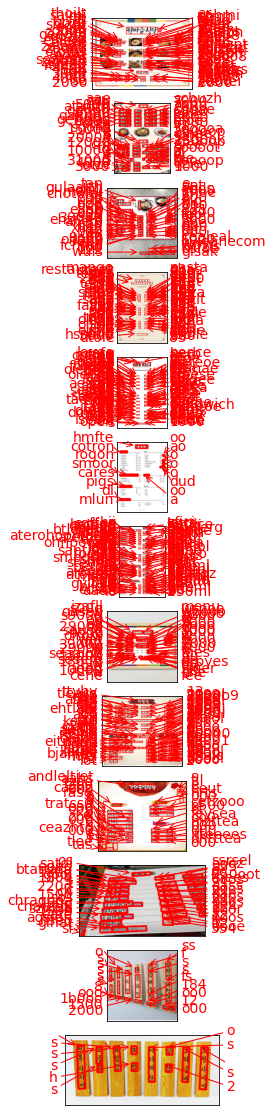

In [15]:
# Plot the predictions of all images
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

<AxesSubplot:>

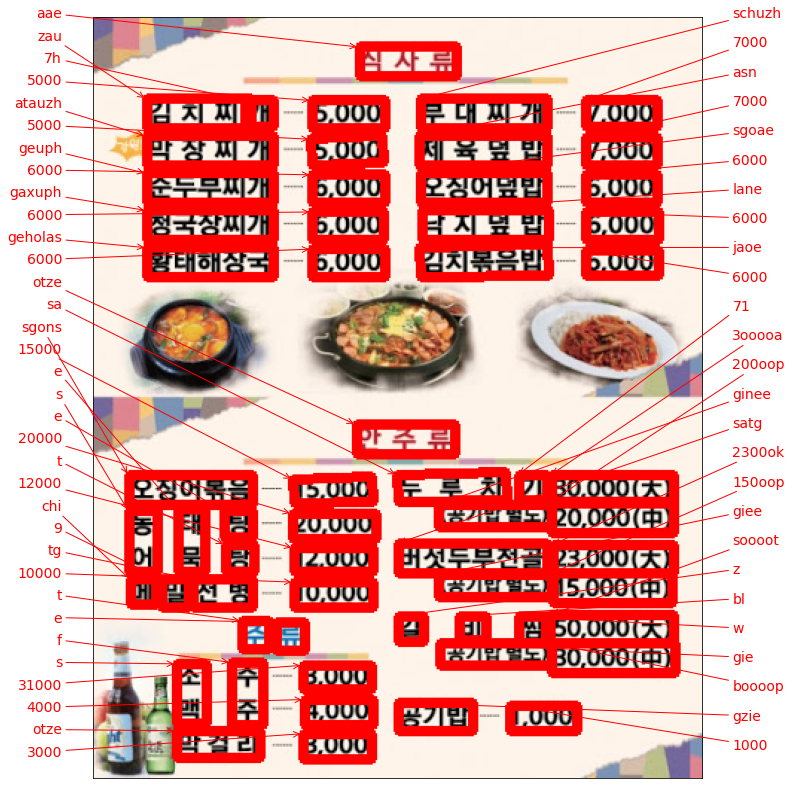

In [16]:
# Plot the predictions of one image

idx = 1
plt.rcParams["figure.figsize"] = (14,14)
keras_ocr.tools.drawAnnotations(image=images[idx], 
                                predictions=prediction_groups[idx][0])

* <span style='color:blue'> keras-ocr을 이용한 경우에 한글은 인식하지 못하고 있다. </span>
* keras-ocr은 한글 데이터셋으로 훈련이 되어있지 않은 모델
  - 한글 텍스트의 detection은 정상적으로 진행되더라도 recognition 결과가 엉뚱하게 나올 수 있음

### Tesseract

In [ ]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

In [ ]:
import os

dir_path = os.getenv('HOME')+ '/aiffel/ocr_python/test_images'
file_lists = os.listdir(dir_path)

In [ ]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            # 크기 (0,0)인 것 제외
            if cropped_image.size > (0, 0):
                cropped_image.save(output_img_path)
                cropped_image_path_list.append(output_img_path)
                index += 1
            else:
                pass
    return cropped_image_path_list

PIL.image를 사용하다가 show()를 했는데 `SystemError: tile cannot extend outside image`가 뜨는 경우가 있다.  
원인은 다양하겠지만 `crop()`함수를 잘못 쓰는 경우 발생할 수 있다.  
img의 size를 확인해본다. 만약 (0, 0)이라면 이미지에 이상이 있다는 것이다.  
` print(img.size)`  
` # (0, 0)`

In [ ]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")


In [ ]:
for file in file_lists:
    image_file = os.path.join(dir_path, file)
    print('file_name: ', file)

    # Tesseract OCR
    cropped_image_path_list = crop_word_regions(image_file, dir_path)
    tesseract_ocr = recognize_images(cropped_image_path_list)
    print('='*70)
    print()

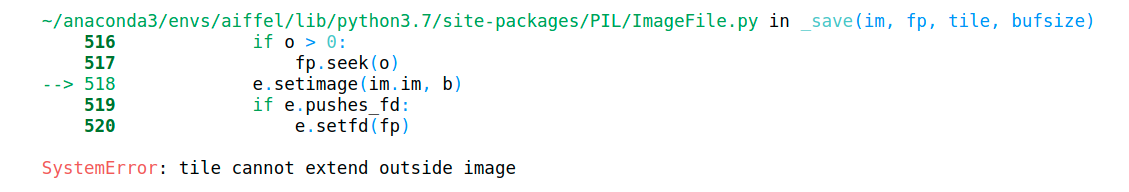

## Step3. 테스트 결과 정리

모듈들마다 출력 형태가 다릅니다.   
분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다.   
시각화 방법이 함께 활용된다면 더욱 좋겠군요.

## Step4. 결과 분석과 결론 제시

* 우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다.
* 여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가기준을 제시합니다.
* 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

## 회고

* keras-ocr을 수행하는 시간이 길게 나온다.
  - OOM 발생함
    - 이미지 파일을 입력으로 하지 않고, 파일 리스트를 입력으로 수정함
    - 파이프라인에 대해서 공부해야겠다.

## 끝